<a href="https://colab.research.google.com/github/atish1208/Data_sci/blob/main/diamondprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
               carat    cut  color clarity         depth         table  \
count   53920.000000  53920  53920   53920  53920.000000  53920.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21548  11284   13063           NaN           NaN   
mean        0.797698    NaN    NaN     NaN     61.749514     57.456834   
std         0.473795    NaN    NaN     NaN      1.432331      2.234064   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53920.000000  5392

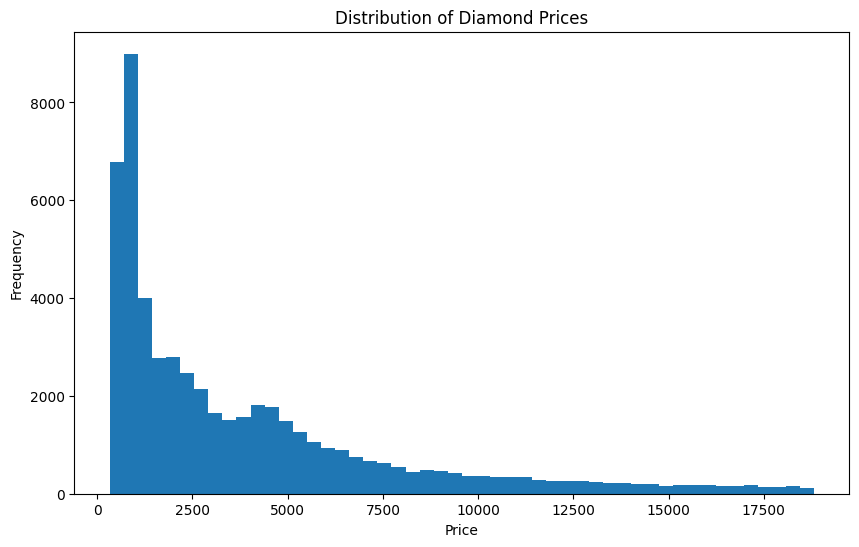

<Figure size 1000x600 with 0 Axes>

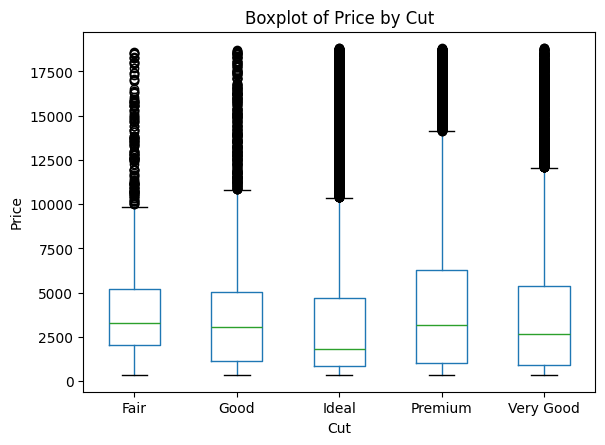

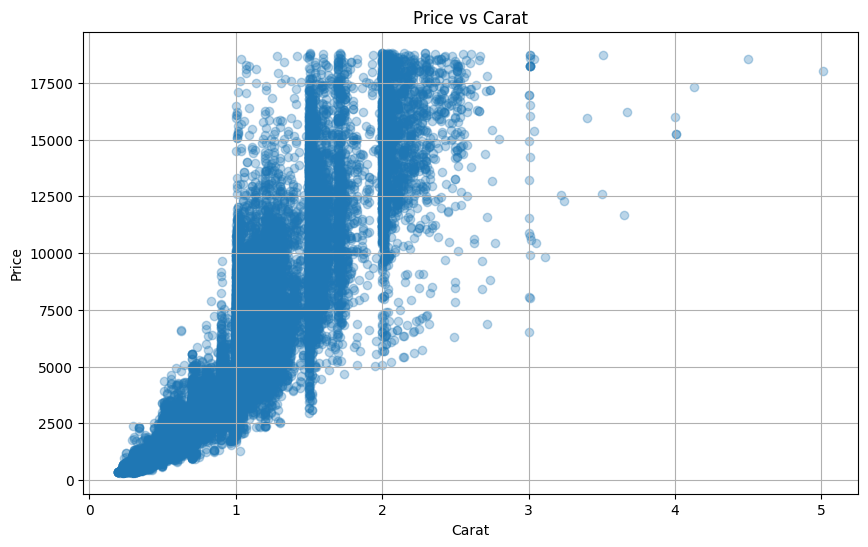

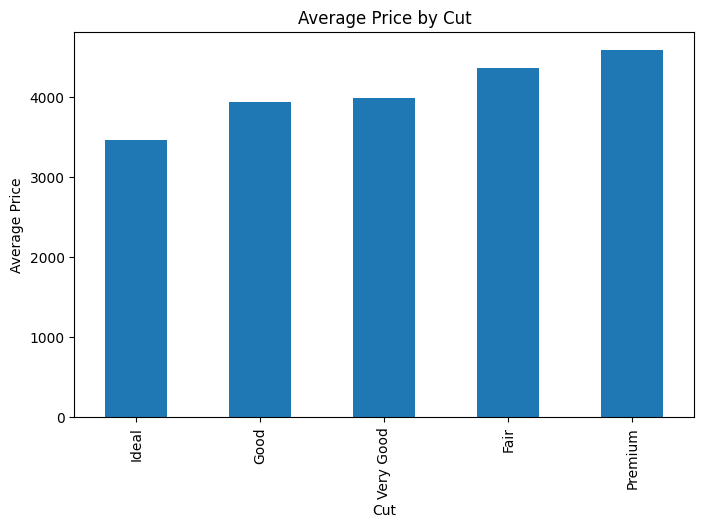

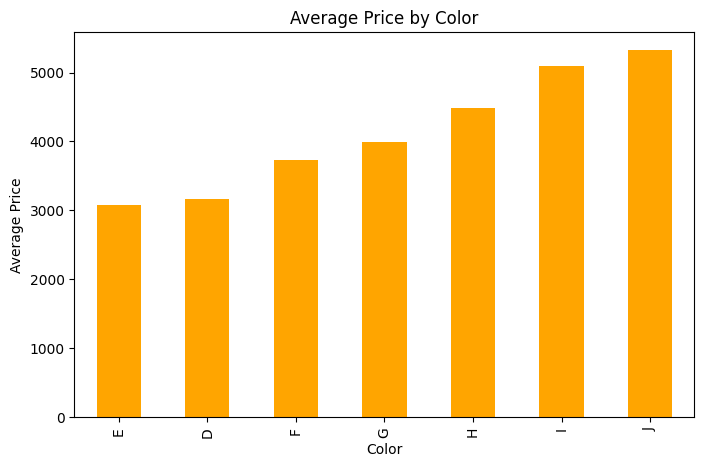

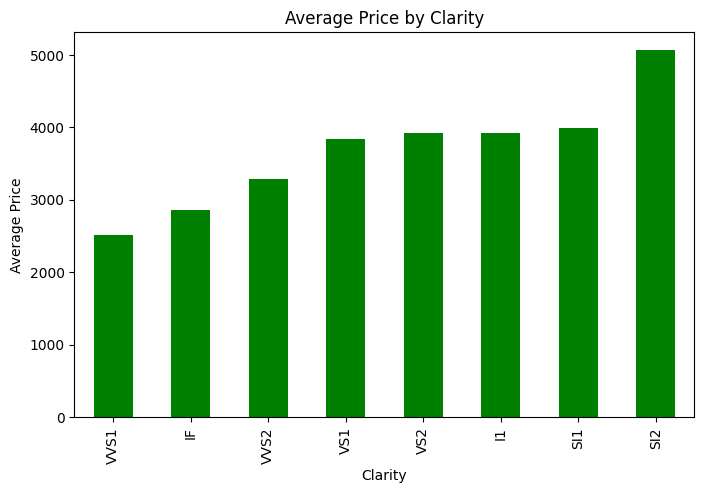

/tmp/ipython-input-3205519528.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_carat_bin = df.groupby("carat_bin")["price"].mean()


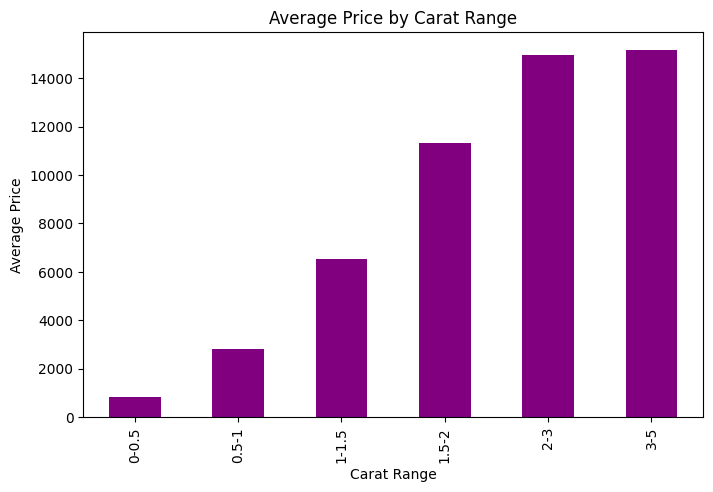

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"/content/diamonds.csv")

# Data Cleaning
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df[(df[['x', 'y', 'z']] > 0).all(axis=1)]

# Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Visualizations
# Histogram of Price
plt.figure(figsize=(10, 6))
df['price'].hist(bins=50)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Boxplot of Price by Cut
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='cut')
plt.title('Boxplot of Price by Cut')
plt.suptitle('')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.grid(False)
plt.show()

# Scatter Plot: Price vs Carat
plt.figure(figsize=(10, 6))
plt.scatter(df['carat'], df['price'], alpha=0.3)
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Analysis: Average Price by Cut, Color, Clarity
avg_price_by_cut = df.groupby("cut")["price"].mean().sort_values()
avg_price_by_color = df.groupby("color")["price"].mean().sort_values()
avg_price_by_clarity = df.groupby("clarity")["price"].mean().sort_values()

# Bar Plot: Average Price by Cut
plt.figure(figsize=(8, 5))
avg_price_by_cut.plot(kind='bar')
plt.title('Average Price by Cut')
plt.ylabel('Average Price')
plt.xlabel('Cut')
plt.grid(False)
plt.show()

# Bar Plot: Average Price by Color
plt.figure(figsize=(8, 5))
avg_price_by_color.plot(kind='bar', color='orange')
plt.title('Average Price by Color')
plt.ylabel('Average Price')
plt.xlabel('Color')
plt.grid(False)
plt.show()

# Bar Plot: Average Price by Clarity
plt.figure(figsize=(8, 5))
avg_price_by_clarity.plot(kind='bar', color='green')
plt.title('Average Price by Clarity')
plt.ylabel('Average Price')
plt.xlabel('Clarity')
plt.grid(False)
plt.show()

# Carat Range Analysis
carat_bins = [0, 0.5, 1, 1.5, 2, 3, 5]
carat_labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-3', '3-5']
df['carat_bin'] = pd.cut(df['carat'], bins=carat_bins, labels=carat_labels)
avg_price_by_carat_bin = df.groupby("carat_bin")["price"].mean()

# Bar Plot: Average Price by Carat Range
plt.figure(figsize=(8, 5))
avg_price_by_carat_bin.plot(kind='bar', color='purple')
plt.title('Average Price by Carat Range')
plt.ylabel('Average Price')
plt.xlabel('Carat Range')
plt.grid(False)
plt.show()